In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import yfinance as yf
import plotly.express as px

%matplotlib inline

In [2]:
# Define tickers symbols
ticker_symbols = ['IVV', 'ASX', 'CSL', 'ELD']
start_year = '2015-1-1'
end_year = '2020-1-1'

stocks_df = pd.DataFrame()

for t in ticker_symbols:
    
    t = yf.Ticker(t)
    ticker_df = t.history(period='1d', start=start_year, end=end_year)
    
    # Save the close columns of each stock into new variables
    t = ticker_df['Close']

    stocks_df = stocks_df.append(t)

stocks_df = stocks_df.T
stocks_df.columns = ticker_symbols

stocks_df.head(10)

,IVV,ASX,CSL,ELD
2014-12-31,183.259933,5.003129,82.669647,30.166451
2015-01-02,183.135925,4.913351,82.468109,29.977922
2015-01-05,179.920227,4.962321,81.377937,29.673347
2015-01-06,178.299133,4.864380,81.643646,29.658852
2015-01-07,180.504913,4.954160,82.797920,29.905426
2015-01-08,183.729462,5.117393,86.114227,30.064928
2015-01-09,182.179199,5.109232,85.802765,30.151960
2015-01-12,180.797226,5.019453,85.921860,30.079445
2015-01-13,180.327728,5.084746,86.215019,30.057697
2015-01-14,179.238129,5.043938,85.692825,30.231724


In [3]:
def analyse_my_stock_portfolio2(stocks, weighting, plot):

    print(f"This is your combined stock portfolio:\n {stocks}")
    print()

    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = stocks.pct_change().dropna()
    print()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    #portfolio_return = combined_stock_df.dot(weighting[0:])
    portfolio_cum_return = (1+daily_returns).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################
                   
    # Plot daily returns
    if plot == 'daily_returns_line':
        fig = plt.figure()
        plot1 = daily_returns.plot(title='Daily returns', figsize=(15, 10))    
        plot1.set_xlabel("")

    #Plot daily returns_box    
    elif plot == 'daily_returns_box':
        fig = plt.figure()
        sns.boxplot(data=daily_returns).set_title('Daily returns')
        sns.set(rc={'figure.figsize':(15, 10)})

    # Plot cumulative returns
    elif plot == 'cumulative_returns':  
        fig = plt.figure()
        plot3 = portfolio_cum_return.plot(title='Cumulative Returns', figsize=(15, 10))
        plot3.set_xlabel("")
        
    #Plot 21-day rolling std dev
    elif plot == '21_day_roll':
        fig = plt.figure()
        plot4 = roll_std.plot(figsize=(15, 10), title='Rolling 21-day standard deviation')
        plot4.set_xlabel(" ")
        
    #Plot correlation
    elif plot == 'correlation':
        fig = plt.figure()
        mask = np.triu(np.ones_like(correlation, dtype=bool))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)  
        sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask)
        sns.set(rc={'figure.figsize':(15,10)})
           
    #Plot Sharpe Ratio
    elif plot =='sharpe_ratio':        
        fig = plt.figure()
        sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', figsize=(15, 10))
   
    else: 
        pass
        
    fig.savefig(f"PerformanceAnalysis_{plot}_Summary.png")

    plt.show()

This is your combined stock portfolio:
                    IVV       ASX         CSL        ELD
2014-12-31  183.259933  5.003129   82.669647  30.166451
2015-01-02  183.135925  4.913351   82.468109  29.977922
2015-01-05  179.920227  4.962321   81.377937  29.673347
2015-01-06  178.299133  4.864380   81.643646  29.658852
2015-01-07  180.504913  4.954160   82.797920  29.905426
...                ...       ...         ...        ...
2019-12-23  315.378113  5.459765  158.110840  33.120270
2019-12-24  315.417206  5.450050  158.374969  33.176235
2019-12-26  317.049774  5.391761  158.609695  33.316143
2019-12-27  316.991119  5.430621  159.480270  33.316143
2019-12-30  315.280365  5.391761  158.502121  33.418739

[1258 rows x 4 columns]



These are your daily returns:
                  IVV       ASX       CSL       ELD
2015-01-02 -0.000677 -0.017945 -0.002438 -0.006250
2015-01-05 -0.017559  0.009967 -0.013219 -0.010160
2015-01-06 -0.009010 -0.019737  0.003265 -0.000489
2015-01-07  0.012371  0.0

<Figure size 432x288 with 0 Axes>

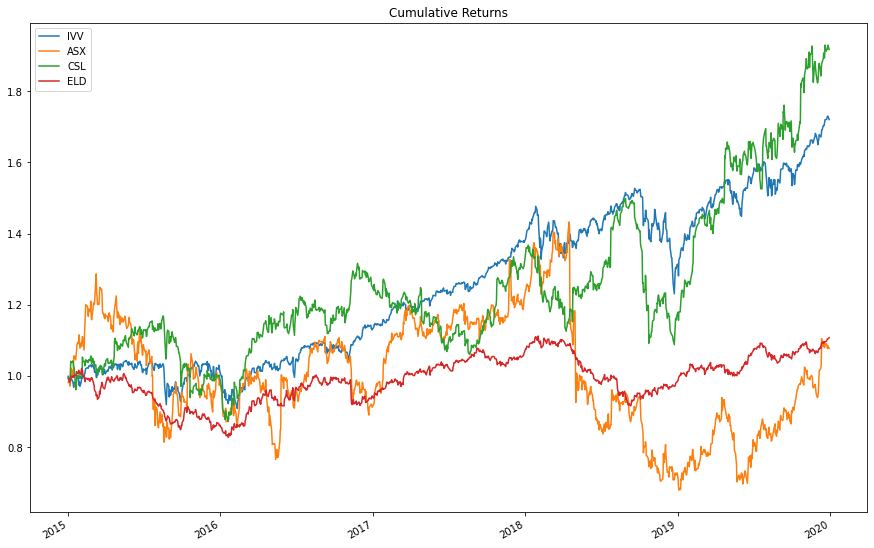

In [4]:
weight = [1/len(ticker_symbols)] * len(ticker_symbols)

analyse_my_stock_portfolio2(stocks_df, weight, plot='cumulative_returns')